In [1]:
import pandas as pd
import numpy as np
from collections import Counter, defaultdict
import torch
import datetime
import matplotlib.pyplot as plt
import torch.nn.functional as torch_F
from scipy.stats import pearsonr
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.cm as cm
from scipy.signal import savgol_filter
from matplotlib.colors import LinearSegmentedColormap

## fitness benchmark

In [12]:
coefficient = torch.load('./data/coefficient_dataset_Site_benchmark_1225_reparam.pkl')
# coefficient = torch.load('./data/coefficient_dataset_Site_benchmark_1225_delBF1.pkl')
# coefficient = torch.load('./data/coefficient_dataset_Site_benchmark_1225_delBQ1.pkl')
# coefficient = torch.load('./data/coefficient_dataset_Site_benchmark_1225_delXBB1.pkl')

In [3]:
lineage_fitness = coefficient['rate'].sum(0)
mutation_fitness = coefficient['coef']
lineages = coefficient['lineages']
mutations = coefficient['mutations']

df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

In [4]:
## share mutation of prevalent lineages
lineage = ['BA.2','BA.2.12.1','BA.5','BA.5.2.1','BF.5','BF.7','BQ.1','BQ.1.1','XBB','XBB.1','XBB.1.5', 'XBB.1.9.1', 'XBB.1.16','EG.5.1', 'HK.3','JN.1']
# lineage = ['BA.2','BA.2.12.1','BA.5','BA.5.2.1','BF.5','BF.7','BQ.1','BQ.1.1','XBB','XBB.1','XBB.1.5']
# for i in range(len(lineages)):
#     if lineages[i][0:2] == 'BF' or lineages[i][0:6] == 'BA.5.2':
#         lineage.append(lineages[i])
features = torch.load('./data/Omicron_experimental_data_new.pkl')['mutation_features']
mutation_index = []
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

for i in range(len(mutations)):
    if features[get_lineage_index(lineage), :][:,i].max() > 1e-1:
        mutation_index.append(i)

mutation_fitness = mutation_fitness[:,mutation_index]

In [5]:
mutation_correlation = torch.zeros(mutation_fitness.shape[0], mutation_fitness.shape[0])

for i in range(mutation_fitness.shape[0]):
    for j in range(mutation_fitness.shape[0]):
        mutation_correlation[i, j] = pearsonr(mutation_fitness[i], mutation_fitness[j])[0]

In [6]:
mutation_correlation = mutation_correlation[1:, 1:]

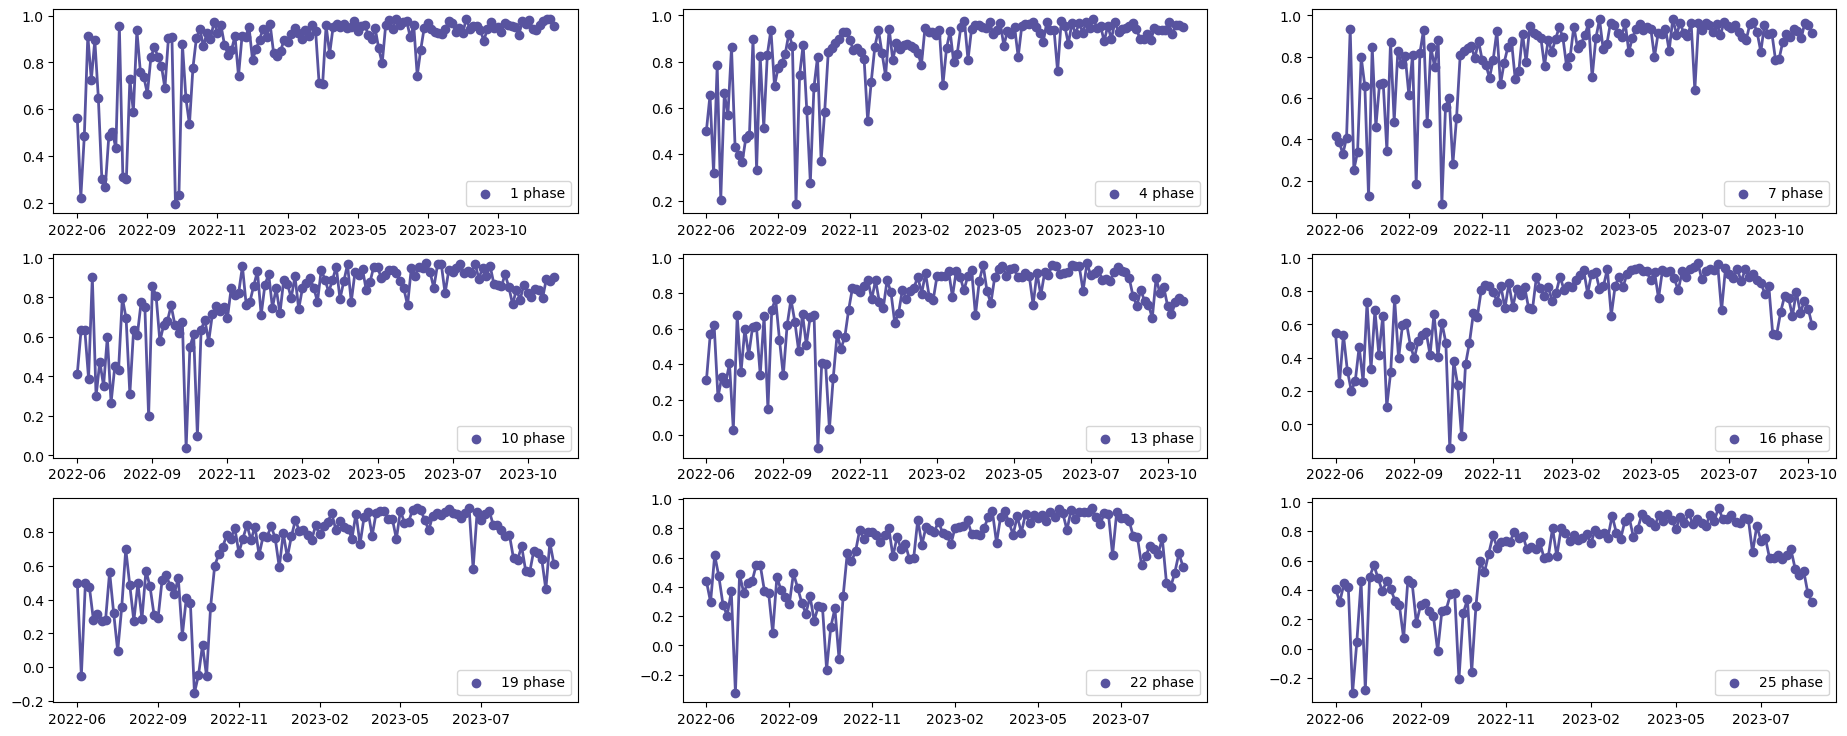

In [7]:
plt.figure(figsize=(23,9))

plt.subplot(331)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(106+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 1+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '1 phase')
datetime_plot = []
string_plot = []
for i in range(106+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(332)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(103+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 4+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '4 phase')
datetime_plot = []
string_plot = []
for i in range(103+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(333)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(100+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 7+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '7 phase')
datetime_plot = []
string_plot = []
for i in range(100+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(334)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(97+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(335)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(94+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 13+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '13 phase')
datetime_plot = []
string_plot = []
for i in range(94+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(336)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(91+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 16+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '16 phase')
datetime_plot = []
string_plot = []
for i in range(91+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(337)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(88+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 19+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '19 phase')
datetime_plot = []
string_plot = []
for i in range(88+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(338)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(85+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 22+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '22 phase')
datetime_plot = []
string_plot = []
for i in range(85+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

plt.subplot(339)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(82+31):
    df_plot.loc[len(df_plot)] = [time[57 + i], mutation_correlation[i, 25+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '25 phase')
datetime_plot = []
string_plot = []
for i in range(82+31):
    if i % 20 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
plt.legend(loc="lower right")

Text(58.2222222222222, 0.5, 'Time')

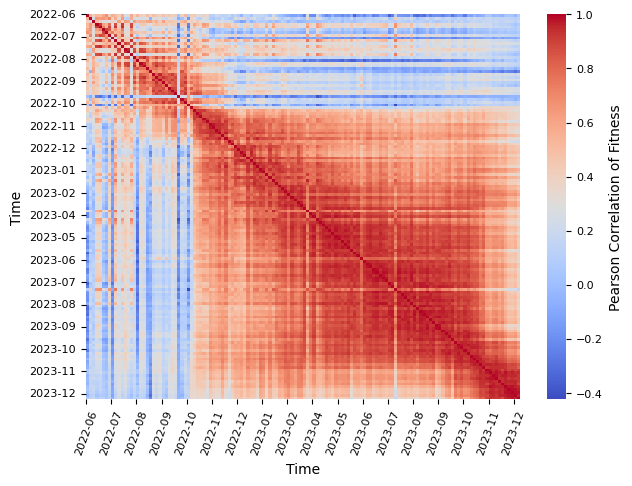

In [8]:
df_mutation_correlation = pd.DataFrame(mutation_correlation)
time_plot = df_counts_time['date']

df_time_plot = pd.DataFrame(time_plot)
df_time_plot['date_plot'] = ''
for i in range(len(df_time_plot)):
    index1 = df_time_plot['date'][i].find('/')
    index2 = df_time_plot['date'][i][index1+1 : ].find('/')
    df_time_plot['date_plot'][i] = df_time_plot['date'][i][:index1+index2+1]

df_mutation_correlation.columns = pd.to_datetime(df_time_plot['date_plot'][57:195], format='%Y-%m')
df_mutation_correlation.index = pd.to_datetime(df_time_plot['date_plot'][57:195], format='%Y-%m')

x_axis = df_mutation_correlation.keys().strftime('%Y-%m')
y_axis = df_mutation_correlation.index.strftime('%Y-%m')

plt.figure(figsize=(7,5))

ax = sns.heatmap(df_mutation_correlation, cmap = 'coolwarm', cbar_kws={'label': 'Pearson Correlation of Fitness'})
ax.set_facecolor('black')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)

ax.collections[0].colorbar.ax.tick_params(labelsize=8)

plt.xticks(np.arange(0, 138, step = 8), x_axis[np.arange(0, 138, step = 8)])
plt.yticks(np.arange(0, 138, step = 8), y_axis[np.arange(0, 138, step = 8)])

plt.tick_params(labelsize=8)

x_major_locator=MultipleLocator(8)
y_major_locator=MultipleLocator(8)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
ax.yaxis.set_major_locator(y_major_locator)

plt.xlabel("Time")
plt.ylabel("Time")

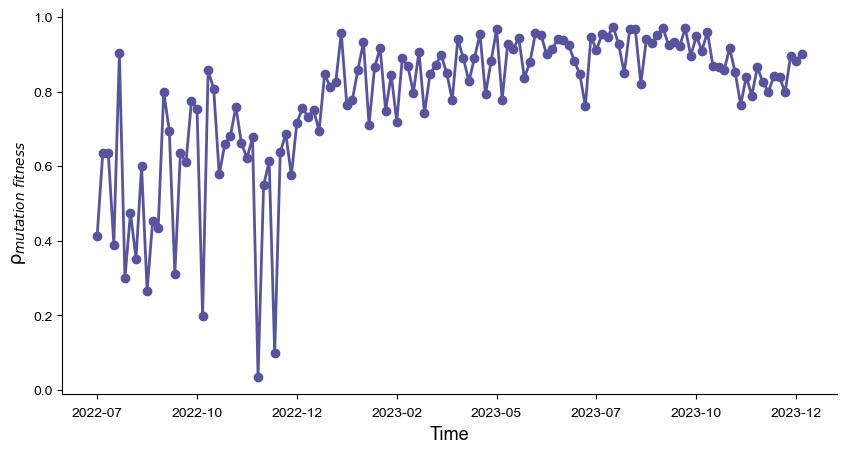

In [9]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(97+31):
    df_plot.loc[len(df_plot)] = [time[57 + i + 10], mutation_correlation[i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
# plt.legend(loc="lower right")
plt.xlabel('Time', fontsize=13)
plt.ylabel(chr(961)+'$_{mutation~fitness}$', fontsize=14)

# plt.axvline(x=df_plot['date'][14],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][38],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][60],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][77],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][110],linestyle='--', color='grey')
# plt.axhline(y=0.9,linestyle='--', color='grey')
# plt.axhline(y=0.75,linestyle='--', color='grey')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.xaxis.set_tick_params(pad=6)
ax1.yaxis.set_tick_params(pad=3)

all_plot = df_plot['pearson']

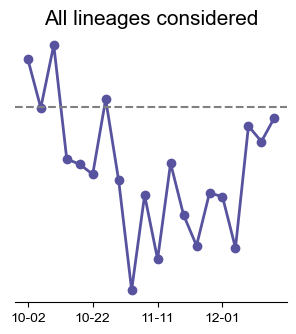

In [13]:
# second decrease
plt.figure(figsize=(3.5,3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(20):
    df_plot.loc[len(df_plot)] = [time[57+108+10 + i], mutation_correlation[108+i, 108+10+i].tolist()]
    # df_plot.loc[len(df_plot)] = [time[57+108+10 + i], mutation_correlation[i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(20):
    if i % 5 == 0:
        datetime_plot.append(df_plot['date'][i])
        # string_plot.append(df_plot['date'][i].strftime('%m-%d')) 
        string_plot.append(df_plot['date'][i].strftime('%m-%d'))   
plt.xticks(datetime_plot, string_plot)
# plt.yticks([0.9, 0.92, 0.94, 0.96])
plt.yticks([])
# plt.ylim(0.75, 1)


plt.title('All lineages considered', fontsize=15)
# plt.title('Without HK sublineages', fontsize=15)
# plt.ylabel("Pearson Correlation", fontsize=12)
plt.axhline(y=0.91,linestyle='--', color='grey')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

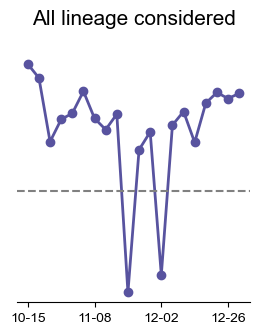

In [14]:
# forst decrease
plt.figure(figsize=(3,3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(20):
    df_plot.loc[len(df_plot)] = [time[57+10+20 + i], mutation_correlation[20+i, 20+10+i].tolist()]
    # df_plot.loc[len(df_plot)] = [time[57+10+20 + i], mutation_correlation[0+i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f', label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(20):
    if i % 6 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%m-%d'))   
plt.xticks(datetime_plot, string_plot)
# plt.yticks([0.76, 0.8, 0.84, 0.88])
plt.yticks([])
plt.ylim(0, 0.97)

# plt.title('Without XBB sublineages', fontsize=15)
plt.title('All lineage considered', fontsize=15)
# plt.ylabel("Pearson Correlation", fontsize=12)
plt.axhline(y=0.4,linestyle='--', color='grey')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

### share mutations' fitness correlation (do not change with time)

In [27]:
lineage_fitness = coefficient['rate'].sum(0)
mutation_fitness = coefficient['coef']
lineages = coefficient['lineages']
mutations = coefficient['mutations']

df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')

In [28]:
df = pd.read_csv('./data/feature_plot.csv', header=0)
threshold = 0.5
period1 = []
for i in range(len(df)):
    if df['BA.5'][i] >threshold and df['BA.5.2.1'][i] >threshold and df['BF.5'][i] >threshold and df['BF.7'][i] >threshold and df['BQ.1'][i] >threshold and df['BQ.1.1'][i] >threshold and df['XBB'][i] >threshold and df['XBB.1'][i] >threshold and df['XBB.1.5'][i] >threshold and df['XBB.1.9'][i] >threshold and df['XBB.1.16'][i] >threshold and df['EG.5.1'][i] >threshold and df['HK.3'][i] >threshold and df['JN.1'][i] >threshold:
        period1.append(1)
    else:
        period1.append(0)

In [29]:
total=0
mutation_plot = []
for i in range(len(period1)):
    total += period1[i]
    if period1[i] == 1:
        mutation_plot.append(mutations[i])
total
colors1 = cm.rainbow(np.arange(10)/10)
colors2 = cm.rainbow(np.arange(7)/7)

In [30]:
mutation_fitness_sub1 = torch.zeros(139).unsqueeze(-1)
for i in range(len(period1)):
    if period1[i] == 1:
        mutation_fitness_sub1 = torch.cat((mutation_fitness_sub1, mutation_fitness[:,i].unsqueeze(-1)), -1)
mutation_fitness_sub1 = mutation_fitness_sub1[:, 1:]

In [31]:
mutation_correlation_sub1 = torch.zeros(129)
for i in range(129):
    mutation_correlation_sub1[i] = pearsonr(mutation_fitness_sub1[i,:], mutation_fitness_sub1[i+10,:])[0]
mutation_correlation_sub1 = mutation_correlation_sub1[1:]

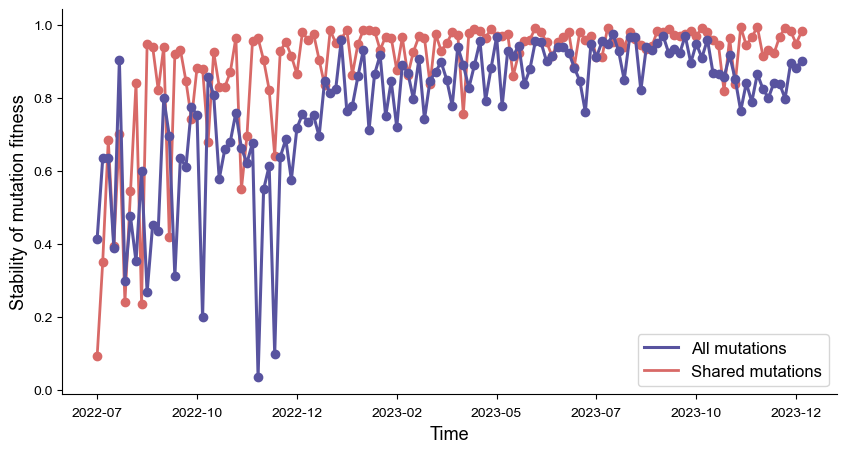

In [32]:
fig, ax1 = plt.subplots(figsize=(10,5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(97+31):
    df_plot.loc[len(df_plot)] = [time[57 + i + 10], mutation_correlation_sub1[i].tolist()]

plt.plot(df_plot['date'], all_plot, lw=2.2, zorder=4, c = '#58539f', label = 'All mutations')
plt.scatter(df_plot['date'], all_plot, marker='o', linewidths=1, zorder=3, c = '#58539f')

plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#d86967', label = 'Shared mutations')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#d86967')

datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
# plt.legend(loc="lower right")
plt.xlabel('Time', fontsize=13)
# plt.ylabel(chr(961)+'$_{mutation~fitness}$', fontsize=14)
plt.ylabel('Stability of mutation fitness', fontsize=13)
# plt.axvline(x=df_plot['date'][14],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][38],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][60],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][77],linestyle='--', color='grey')
# plt.axvline(x=df_plot['date'][110],linestyle='--', color='grey')
# plt.axhline(y=0.9,linestyle='--', color='grey')
# plt.axhline(y=0.75,linestyle='--', color='grey')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax1.xaxis.set_tick_params(pad=6)
ax1.yaxis.set_tick_params(pad=3)
plt.legend(loc='lower right', fontsize = 12)

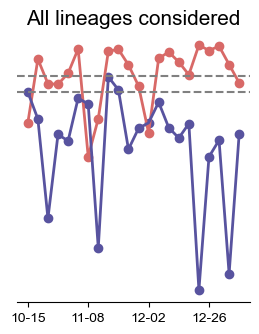

In [36]:
# second decrease
plt.figure(figsize=(3,3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(22):
    df_plot.loc[len(df_plot)] = [time[57+10+20 + i], mutation_correlation_sub1[20+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#d86967')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#d86967', label = '10 phase')

plt.plot(df_plot['date'], all_plot[12:12+22], lw=2, zorder=2, c = '#58539f', label = 'All mutations')
plt.scatter(df_plot['date'], all_plot[12:12+22], marker='o', linewidths=1, zorder=1, c = '#58539f')

datetime_plot = []
string_plot = []
for i in range(22):
    if i % 6 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%m-%d'))   
plt.xticks(datetime_plot, string_plot)
# plt.yticks([0.75, 0.8, 0.85, 0.9, 0.95], [0.75, 0.8, 0.85, 0.9, 0.95])
plt.yticks([])
# plt.ylim(0.75, 0.97)

plt.title('All lineages considered', fontsize=15)
# plt.title('Without BQ sublineages', fontsize=15)
# plt.ylabel("Pearson Correlation", fontsize=12)
plt.axhline(y=0.8,linestyle='--', color='grey')
plt.axhline(y=0.86,linestyle='--', color='grey')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

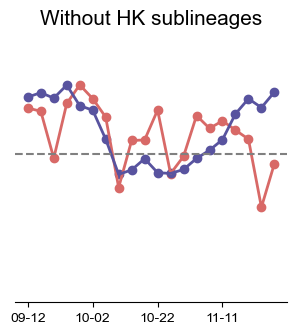

In [763]:
# first decrease
plt.figure(figsize=(3.5,3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(20):
    df_plot.loc[len(df_plot)] = [time[57+10+103 + i], mutation_correlation_sub1[103+i].tolist()]
    # df_plot.loc[len(df_plot)] = [time[57+12 + i], mutation_correlation[12+i, 12+10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#d86967')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#d86967', label = '10 phase')

plt.plot(df_plot['date'], all_plot[103:103+20], lw=2, zorder=2, c = '#58539f', label = 'All mutations')
plt.scatter(df_plot['date'], all_plot[103:103+20], marker='o', linewidths=1, zorder=1, c = '#58539f')

datetime_plot = []
string_plot = []
for i in range(20):
    if i % 5 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%m-%d'))   
plt.xticks(datetime_plot, string_plot)
# plt.yticks([0.8, 0.85, 0.9, 0.95, 1], [0.8, 0.85, 0.9, 0.95, 1])
plt.yticks([])
plt.ylim(0.8, 1)

# plt.title('All lineages considered', fontsize=15)
plt.title('Without HK sublineages', fontsize=15)
# plt.ylabel("Pearson Correlation", fontsize=12)
plt.axhline(y=0.91,linestyle='--', color='grey')
# plt.axhline(y=0.875,linestyle='--', color='grey')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)

In [24]:
lineages = torch.load('./data/Omicron_experimental_data_new.pkl')['lineages']
country = torch.load('./data/Omicron_experimental_data_new.pkl')['locations']

df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts'].sum(1)
counts = counts / (counts.sum(-1).unsqueeze(-1) + 1e-20)

def get_counts(lineage_index):
    df_counts = pd.DataFrame(counts[:, lineage_index])
    return df_counts

def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index

# lineage = []
# for i in range(len(lineages)):
#     if lineages[i][:3] == 'XBB' and len(lineages[i]) <8 and get_counts(get_lineage_index([lineages[i]]))[57+10+14:77+10+14].max()[0] > 0.001:
#         lineage.append(lineages[i])
    # elif get_counts(get_lineage_index([lineages[i]]))[57:77].max()[0] > 0.1:
    #     lineage.append(lineages[i])
    # if get_counts(get_lineage_index([lineages[i]]))[57+14:67+14].max()[0] > 0.01:
    #     lineage.append(lineages[i])
lineage = ['BA.5', 'BA.5.2.1', 'BF.5', 'BF.7', 'BQ.1', 'BQ.1.1', 'XBB', 'XBB.1', 'XBB.1.5', 'XBB.1.9', 'XBB.1.16', 'EG.5.1', 'HK.3', 'JN.1']
colors = cm.rainbow(np.arange(len(lineage))/len(lineage))

/var/folders/b4/79t4ch4d6r75j7xb9y8qj3vc0000gn/T/ipykernel_56260/3772560394.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum'][67+i] = sum_all
/var/folders/b4/79t4ch4d6r75j7xb9y8qj3vc0000gn/T/ipykernel_56260/3772560394.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lineage[j]][i+67] = data[lineage[j]][i+67] / (data['sum'][i+67]+1e-20)


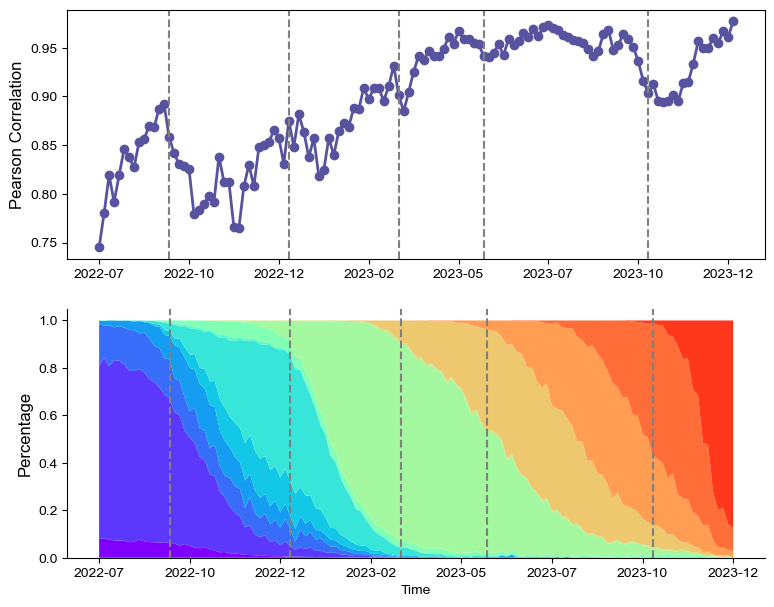

In [610]:
plt.figure(figsize=(9,11))
plt.subplot(311)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(97+31):
    df_plot.loc[len(df_plot)] = [time[57 + i + 10], mutation_correlation[i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f')#, label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
# plt.legend(loc="lower right")
plt.ylabel("Pearson Correlation", fontsize=12)
plt.axvline(x=df_plot['date'][14],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][38],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][60],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][77],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][110],linestyle='--', color='grey')


# plt.subplot2grid((2,1),(1,0),colspan=2,rowspan=2)
ax = plt.subplot(312)
start = 57
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts'].sum(1)
data = pd.DataFrame()
data['time'] = ''
data['time'] = time[57+10 : 57+10+97+30]
for j in range(len(lineage)):
    data[lineage[j]] = ''
    data[lineage[j]] = get_counts(get_lineage_index(lineage))[57+10:57+10+97+30][j]
data['sum'] = ''
for i in range(len(data)):
    sum_all = 0
    for j in range(len(lineage)):
        sum_all = sum_all + data[lineage[j]][67+i]
    data['sum'][67+i] = sum_all
for i in range(len(data)):
    for j in range(len(lineage)):
        data[lineage[j]][i+67] = data[lineage[j]][i+67] / (data['sum'][i+67]+1e-20)
time = pd.to_datetime(data['time'])
plt.stackplot(time, data['BA.5'],data['BA.5.2.1'],data['BF.5'],data['BF.7'],data['BQ.1'],data['BQ.1.1'],data['XBB'],data['XBB.1'],data['XBB.1.5'],data['XBB.1.9'],data['XBB.1.16'],data['EG.5.1'],data['HK.3'],data['JN.1'],  colors = colors)
plt.xlabel('Time') 
plt.ylabel('Percentage', fontsize = 12) 
# plt.margins(0,0)
plt.axvline(x=time[14+start+10],linestyle='--', color='grey')
plt.axvline(x=time[38+start+10],linestyle='--', color='grey')
plt.axvline(x=time[60+start+10],linestyle='--', color='grey')
plt.axvline(x=time[77+start+10],linestyle='--', color='grey')
plt.axvline(x=time[110+start+10],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(time[start+10+i])
        string_plot.append(time[start+10+i].strftime('%Y-%m'))
plt.xticks(datetime_plot, string_plot)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.subplots_adjust(hspace=0.2,wspace=0.4)

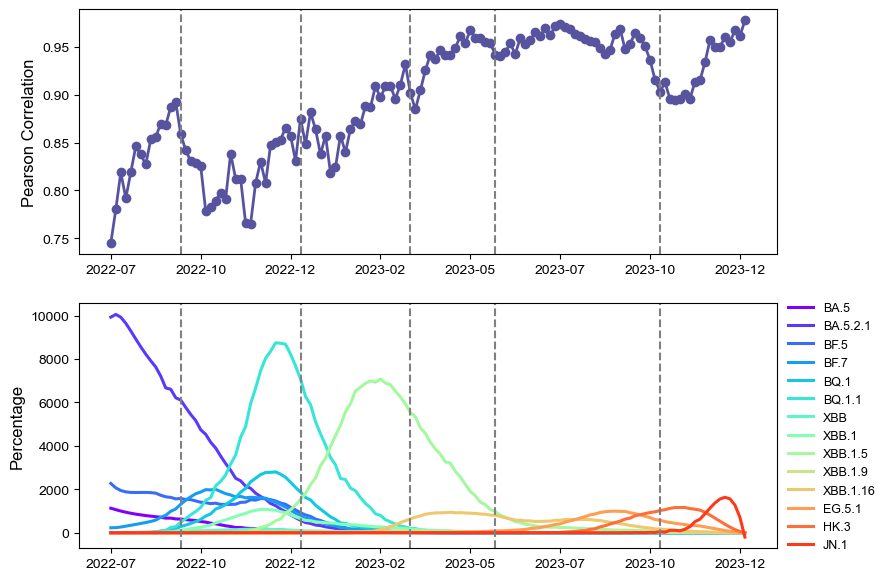

In [251]:
plt.figure(figsize=(9,7))
# plt.subplot2grid((2,1),(0,0),colspan=2,rowspan=2)
plt.subplot(211)
df_plot = pd.DataFrame(columns=['date', 'pearson'])
for i in range(97+31):
    df_plot.loc[len(df_plot)] = [time[57 + i + 10], mutation_correlation[i, 10+i].tolist()]
plt.plot(df_plot['date'], df_plot['pearson'], lw=2, zorder=2, c = '#58539f')
plt.scatter(df_plot['date'], df_plot['pearson'], marker='o', linewidths=1, zorder=1, c = '#58539f')#, label = '10 phase')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(df_plot['date'][i])
        string_plot.append(df_plot['date'][i].strftime('%Y-%m'))   
plt.xticks(datetime_plot, string_plot)
# plt.legend(loc="lower right")
plt.ylabel("Pearson Correlation", fontsize=12)
plt.axvline(x=df_plot['date'][14],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][38],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][60],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][77],linestyle='--', color='grey')
plt.axvline(x=df_plot['date'][110],linestyle='--', color='grey')


# plt.subplot2grid((2,1),(1,0),colspan=2,rowspan=2)
ax = plt.subplot(212)
start = 57
for i in range(len(lineage)):
    plt.plot(time[:counts.shape[0]][start+10:], savgol_filter(get_counts(get_lineage_index(lineage))[start+10:][i], 20, 5), color = colors[i], lw=2.2, zorder=-9, label = lineage[i])
# plt.legend(loc='center right', fontsize=9)
plt.legend(frameon=False, bbox_to_anchor=(1,1.05), fontsize=9)
# plt.ylim(0, 0.02)
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(time[:counts.shape[0]][start+10:-1][start+10+i])
        string_plot.append(time[:counts.shape[0]][start+10:-1][start+10+i].strftime('%Y-%m'))
plt.xticks(datetime_plot, string_plot)
plt.ylabel("Percentage", fontsize=12)
# plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0), useMathText=True)
plt.axvline(x=time[:counts.shape[0]][start+10:][14+start+10],linestyle='--', color='grey')
# plt.axvline(x=time[:counts.shape[0]][start+10:][14+start],linestyle='--', color='grey')
plt.subplots_adjust(hspace=0.2,wspace=0.4)
plt.axvline(x=time[:counts.shape[0]][start+10:][38+start+10],linestyle='--', color='grey')
plt.axvline(x=time[:counts.shape[0]][start+10:][60+start+10],linestyle='--', color='grey')
plt.axvline(x=time[:counts.shape[0]][start+10:][77+start+10],linestyle='--', color='grey')
plt.axvline(x=time[:counts.shape[0]][start+10:][110+start+10],linestyle='--', color='grey')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
/var/folders/b4/79t4ch4d6r75j7xb9y8qj3vc0000gn/T/ipykernel_56260/925544296.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax.get_xticklabels(), rotation=70)


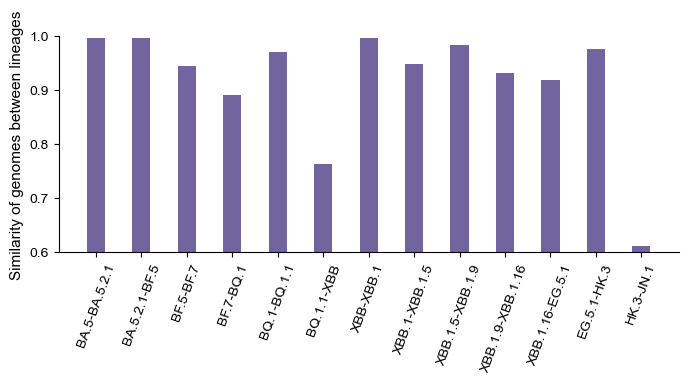

In [577]:
## lineages pair mutation correlation
df = pd.read_csv('./data/lineage_pair_mutation_correlation.csv', header = 0)

plt.rcParams['font.sans-serif'] = ['Arial']

bar_width = 0.2
index_sigma_Eu = np.arange(len(df))/2 

fig=plt.figure(figsize=(8,2.8))
ax1 = fig.add_subplot(111)
ax1.bar(index_sigma_Eu, height=df['freq-pcc'], width=bar_width,color = '#72649E')
ax1.legend(frameon=False,loc=(0.05,0.85), fontsize = 12)
ax1.set_ylabel('Similarity of genomes between lineages', fontsize = 11)
# ax1.set_xlabel('Lineage pair', fontsize = 12)
ax1.set_xticklabels(ax.get_xticklabels(), rotation=70)
plt.xticks(index_sigma_Eu + bar_width/2 -0.1 , df['lineage-pair'], fontsize = 10) 
plt.ylim(0.6, 1)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

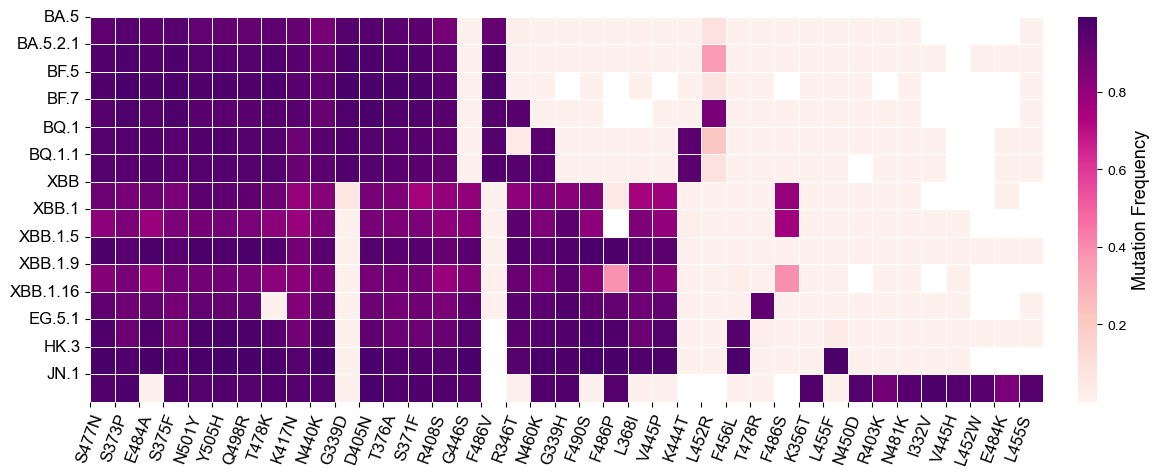

In [158]:
## mutation feature heatmap
df_mutation_feature = pd.read_csv('./data/feature_plot1.csv', header=0)
df_mutation = df_mutation_feature['mutation']
df_mutation_feature.drop('mutation', axis=1, inplace=True)
plt.figure(figsize=(15,5))
plt.rcParams['font.sans-serif'] = ['Arial']

# colors = ['#FFFAF0','#FDF5E6','#E6E6FA','#AB82FF','#9F79EE','#8968CD','#5D478B']
# mycolormap = LinearSegmentedColormap.from_list('mycolormap', colors)

ax = sns.heatmap(df_mutation_feature, cmap = 'RdPu', cbar_kws={'label': 'Mutation Frequency', 'pad':0.03},linewidths=0.5,center=0.48)
# ax = sns.heatmap(df_mutation_correlation, cmap = 'coolwarm', mask=mask, cbar_kws={'label': 'Pearson Correlation of Fitness'})
# ax.set_facecolor('#696969')
ax.set_xticklabels(ax.get_xticklabels(), rotation=70)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)

ax.collections[0].colorbar.ax.tick_params(labelsize=10)
ax.figure.axes[-1].yaxis.label.set_size(13)

x_axis = df_mutation_feature.keys()
y_axis = df_mutation
plt.xticks(np.arange(0, len(df_mutation_feature.keys()), step = 1), x_axis[np.arange(0, len(df_mutation_feature.keys()), step = 1)],fontsize=12)
plt.yticks(np.arange(0, len(df_mutation), step = 1), y_axis[np.arange(0, len(df_mutation), step = 1)],fontsize=12)

In [2]:
lineages = torch.load('./data/Omicron_experimental_data_new_0125.pkl')['lineages']
forecast_AE = torch.load('/Users/leizhongyi/Code/pyro/fig6_code/MAE_every_step_10forecast_reparam.pkl', map_location=torch.device('cpu'))
lineage = ['BA.5','BA.5.2.1','BF.5','BF.7','BQ.1.1','XBB','XBB.1','XBB.1.5', 'XBB.1.9', 'XBB.1.16','EG.5.1', 'HK.3','HV.1','JN.1','JN.1.1']
# lineage = ['JN.1']
# lineage = ['BA.2','BA.5.1','BA.5.2.1','BQ.1.1','XBB.1.5','XBB.1.9','XBB.1.16','EG.5.1','HK.3','JN.1','JN.1.1']
def get_lineage_index(list):
    index = []
    for i in range(len(list)):
        index.append(lineages.index(list[i]))
    return index
import math
df_print = 100**(forecast_AE[10:-7,:,get_lineage_index(lineage)].sum(-1).T)
pd.DataFrame(df_print).to_csv('./data/mae_benchmark_world.csv',index=False)

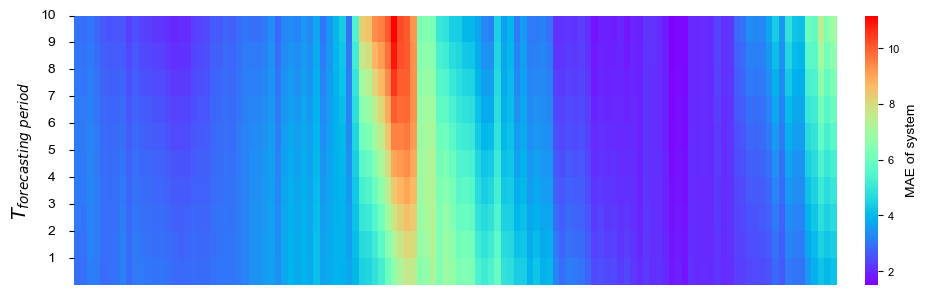

In [4]:
fig,ax1 = plt.subplots(figsize=(12,3.5))
plt.rcParams['font.sans-serif'] = ['Arial']
data=pd.read_csv('./data/mae_benchmark_world.csv',header = 0)

y_axis = data.index

ax=sns.heatmap(data, cmap = 'rainbow', cbar_kws={'label': 'MAE of system', 'pad':0.03})
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
ax.collections[0].colorbar.ax.tick_params(labelsize=8)

plt.xticks([])
plt.tick_params(labelsize=10)
plt.ylabel('$T_{forecasting~period}$', fontsize = 14)
plt.yticks([0,1,2,3,4,5,6,7,8,9], [10,9,8,7,6,5,4,3,2,1])
ax1.yaxis.set_tick_params(pad=10)

/var/folders/b4/79t4ch4d6r75j7xb9y8qj3vc0000gn/T/ipykernel_28332/713675743.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sum'][67+i] = sum_all
/var/folders/b4/79t4ch4d6r75j7xb9y8qj3vc0000gn/T/ipykernel_28332/713675743.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[lineage[j]][i+67] = data[lineage[j]][i+67] / (data['sum'][i+67]+1e-20)


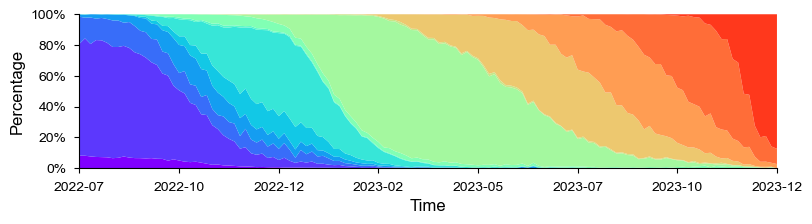

In [25]:
fig, ax1 = plt.subplots(figsize=(9,2))
start = 57
counts = torch.load('./data/Omicron_experimental_data_new.pkl')['counts'].sum(1)
df_counts_time = pd.read_csv('./data/4days_date.csv', header = 0)
time = pd.to_datetime(df_counts_time['date'], format='%Y-%m-%d')
data = pd.DataFrame()
data['time'] = ''
data['time'] = time[57+10 : 57+10+97+30]
for j in range(len(lineage)):
    data[lineage[j]] = ''
    data[lineage[j]] = get_counts(get_lineage_index(lineage))[57+10:57+10+97+30][j]
data['sum'] = ''
for i in range(len(data)):
    sum_all = 0
    for j in range(len(lineage)):
        sum_all = sum_all + data[lineage[j]][67+i]
    data['sum'][67+i] = sum_all
for i in range(len(data)):
    for j in range(len(lineage)):
        data[lineage[j]][i+67] = data[lineage[j]][i+67] / (data['sum'][i+67]+1e-20)
time = pd.to_datetime(data['time'])
plt.stackplot(time, data['BA.5'],data['BA.5.2.1'],data['BF.5'],data['BF.7'],data['BQ.1'],data['BQ.1.1'],data['XBB'],data['XBB.1'],data['XBB.1.5'],data['XBB.1.9'],data['XBB.1.16'],data['EG.5.1'],data['HK.3'],data['JN.1'],  colors = colors)
plt.xlabel('Time', fontsize = 12) 
plt.ylabel('Percentage', fontsize = 12)
plt.margins(0,0)
# plt.axvline(x=time[14+start+10],linestyle='--', color='grey')
# plt.axvline(x=time[38+start+10],linestyle='--', color='grey')
# plt.axvline(x=time[60+start+10],linestyle='--', color='grey')
# plt.axvline(x=time[77+start+10],linestyle='--', color='grey')
# plt.axvline(x=time[110+start+10],linestyle='--', color='grey')
datetime_plot = []
string_plot = []
for i in range(97+31):
    if i % 18 == 0:
        datetime_plot.append(time[start+10+i])
        string_plot.append(time[start+10+i].strftime('%Y-%m'))
plt.xticks(datetime_plot, string_plot)
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], ['0%', '20%', '40%', '60%', '80%', '100%'])
ax1.xaxis.set_tick_params(pad=6)
ax1.yaxis.set_tick_params(pad=6)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)